In [55]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np


In [56]:
script = pd.read_csv('Game_of_Thrones_Script_count_senti.csv')
script.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence,Tokenize Words,Tokenize Words Alphanumeric Only,Sentence Word Count,Row,Family Name,Sentiment Scores,Polarity,Subjectivity
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,"['What', 'do', 'you', 'expect', '?', 'They', ""...","['What', 'do', 'you', 'expect', 'They', 'savag...",25,0,other,"Sentiment(polarity=-0.125, subjectivity=0.375)",-0.125,0.375
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,"['I', ""'ve"", 'never', 'seen', 'wildlings', 'do...","['I', 'never', 'seen', 'wildlings', 'do', 'a',...",21,1,other,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,"['How', 'close', 'did', 'you', 'get', '?']","['How', 'close', 'did', 'you', 'get']",5,2,other,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,"['Close', 'as', 'any', 'man', 'would', '.']","['Close', 'as', 'any', 'man', 'would']",5,3,other,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,"['We', 'should', 'head', 'back', 'to', 'the', ...","['We', 'should', 'head', 'back', 'to', 'the', ...",7,4,other,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000


In [57]:
script["appearances"] = 1
script["FamCodes"]=script["Family Name"].astype('category').cat.codes

In [58]:
script.groupby(['Name'])["Family Name"].unique()

Name
a voice           [other]
addam marbrand    [other]
aemon             [other]
aeron             [other]
aerson            [other]
                   ...   
young hodor       [other]
young lyanna      [other]
young man         [other]
young ned         [other]
young rodrik      [other]
Name: Family Name, Length: 564, dtype: object

In [59]:
top_20 = script.groupby(['Name', 'Family Name', "FamCodes"])[['Sentence Word Count', 'appearances']].sum().reset_index().sort_values(by=['Sentence Word Count']
                                                                                         , ascending=[0])
top_20["wordsPsentence"] = top_20["Sentence Word Count"] / top_20["appearances"]

In [60]:
top_20 = top_20[:20]

In [61]:
top_5 = ["tyrion lannister", "cersei lannister", "daenerys targaryen", "jon snow", "jaime lannister"]

In [486]:
top_20[top_20["Name"].isin(top_5)]

,Name,Family Name,FamCodes,Sentence Word Count,appearances,wordsPsentence
509,tyrion lannister,lannister,4,25860,1760,14.693182
70,cersei lannister,lannister,4,14388,1005,14.316418
86,daenerys targaryen,targaryen,9,12332,1048,11.767176
193,jon snow,snow,7,12245,1133,10.807590
180,jaime lannister,lannister,4,11672,945,12.351323


In [494]:
wpsdata = top_20[top_20["Name"].isin(top_5)].sort_values(by="wordsPsentence", ascending=True)[["Name", "wordsPsentence"]]

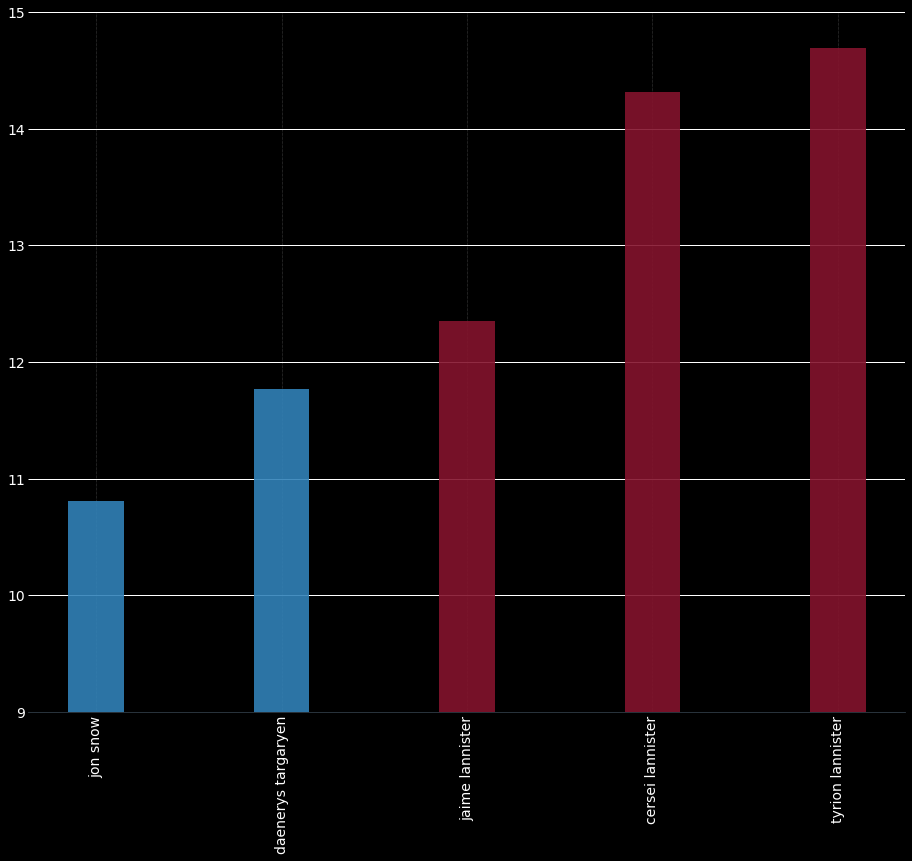

In [541]:
fig, ax = plt.subplots(figsize=(14, 12))
ax.grid(which='both', axis='x', linestyle=':', linewidth=0.5, c='grey')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.style.use('dark_background')
# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.ylim(9,15)
#plt.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(rotation=90)
plt.bar(wpsdata["Name"],wpsdata["wordsPsentence"], alpha=0.9, width=0.3, color=['#3282b8','#3282b8','#84142d','#84142d','#84142d'])
plt.savefig('wordspersentence.png')

In [64]:
script.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence,Tokenize Words,Tokenize Words Alphanumeric Only,Sentence Word Count,Row,Family Name,Sentiment Scores,Polarity,Subjectivity,appearances,FamCodes
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,"['What', 'do', 'you', 'expect', '?', 'They', ""...","['What', 'do', 'you', 'expect', 'They', 'savag...",25,0,other,"Sentiment(polarity=-0.125, subjectivity=0.375)",-0.125,0.375,1,6
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,"['I', ""'ve"", 'never', 'seen', 'wildlings', 'do...","['I', 'never', 'seen', 'wildlings', 'do', 'a',...",21,1,other,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000,1,6
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,"['How', 'close', 'did', 'you', 'get', '?']","['How', 'close', 'did', 'you', 'get']",5,2,other,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000,1,6
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,"['Close', 'as', 'any', 'man', 'would', '.']","['Close', 'as', 'any', 'man', 'would']",5,3,other,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000,1,6
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,"['We', 'should', 'head', 'back', 'to', 'the', ...","['We', 'should', 'head', 'back', 'to', 'the', ...",7,4,other,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000,1,6


In [285]:
#nopol = script[script["Polarity"] != 0.0]
dfsenti = script.groupby(['Name', 'Season', 'Episode'])['Sentence Word Count', "Polarity"].agg({'Sentence Word Count':'sum', "Polarity":"mean"}).reset_index()
dfsenti["Season_num"] = dfsenti.Season.str.extract('(\d+)').astype(int)
dfsenti["Episode_num"] = dfsenti.Episode.str.extract('(\d+)').astype(int)
dfsenti["Season-Episode"] = dfsenti[["Season_num", "Episode_num"]].astype(str).agg('-'.join, axis=1)
dfsenti = dfsenti[dfsenti["Name"].isin(top_20["Name"])]
dfsenti = dfsenti.sort_values(by=["Season_num","Episode_num"]).reset_index(drop=True)
dfcat = dfsenti[dfsenti["Name"] == "cersei lannister"].reset_index(drop=True)
dfcat.head(30)

,Name,Season,Episode,Sentence Word Count,Polarity,Season_num,Episode_num,Season-Episode
0,cersei lannister,Season 1,Episode 1,140,0.044240,1,1,1-1
1,cersei lannister,Season 1,Episode 2,287,-0.024799,1,2,1-2
2,cersei lannister,Season 1,Episode 3,306,-0.021106,1,3,1-3
3,cersei lannister,Season 1,Episode 4,136,0.027381,1,4,1-4
4,cersei lannister,Season 1,Episode 5,246,-0.032976,1,5,1-5
5,cersei lannister,Season 1,Episode 6,74,-0.023661,1,6,1-6
6,cersei lannister,Season 1,Episode 7,128,0.043080,1,7,1-7
7,cersei lannister,Season 1,Episode 8,90,-0.028125,1,8,1-8
8,cersei lannister,Season 1,Episode 9,5,0.000000,1,9,1-9
9,cersei lannister,Season 1,Episode 10,6,0.000000,1,10,1-10


In [286]:
allepisodes = pd.Series(dfsenti["Season-Episode"].unique())
len(allepisodes)

73

In [287]:
allepisodes = pd.Series(dfsenti["Season-Episode"].unique())
for episode in allepisodes:
    if episode not in dfcat["Season-Episode"].values:
            season, episode_num = episode.split("-")
            dfcat.loc[len(dfcat["Name"])] = ['cersei lannister', 'placeholder', 'placeholder', 0, 0.0, int(season), int(episode_num), episode]
dfcat = dfcat.sort_values(by=["Season_num","Episode_num"])

Text(72    8-6
Name: Season-Episode, dtype: object, 72    0.0
Name: Polarity, dtype: float64, ' cersei lannister')

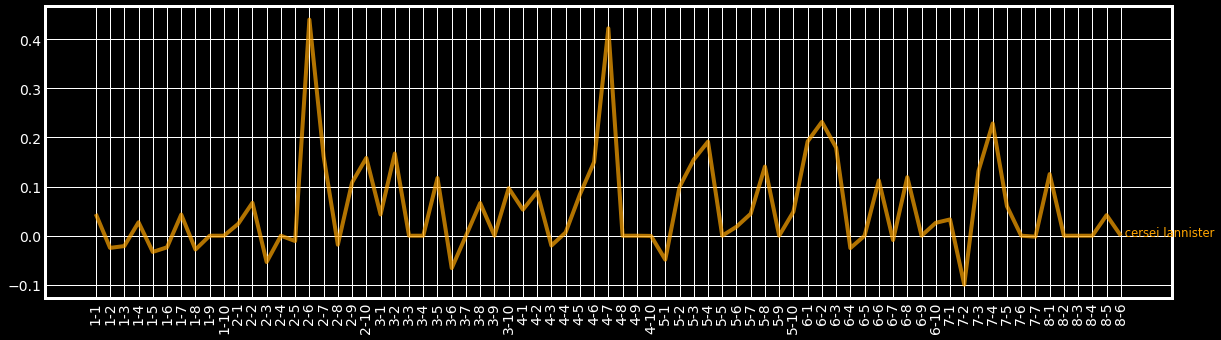

In [288]:
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
plt.plot(dfcat['Season-Episode'], dfcat['Polarity'], marker='', color='orange', linewidth=4, alpha=0.7)
plt.text(dfcat["Season-Episode"].tail(1), dfcat.Polarity.tail(1), ' '+ dfcat["Name"].iloc[0], horizontalalignment='left', size='small', color='orange')

,Name,Season,Episode,Sentence Word Count,Polarity,Season_num,Episode_num,Season-Episode
0,daenerys targaryen,Season 1,Episode 1,70,0.061111,1,1,1-1
1,daenerys targaryen,Season 1,Episode 2,91,0.107692,1,2,1-2
2,daenerys targaryen,Season 1,Episode 3,40,0.000000,1,3,1-3
3,daenerys targaryen,Season 1,Episode 4,205,0.022976,1,4,1-4
60,daenerys targaryen,placeholder,placeholder,0,0.000000,1,5,1-5
4,daenerys targaryen,Season 1,Episode 6,43,0.042857,1,6,1-6
5,daenerys targaryen,Season 1,Episode 7,139,0.000000,1,7,1-7
61,daenerys targaryen,placeholder,placeholder,0,0.000000,1,8,1-8
6,daenerys targaryen,Season 1,Episode 9,206,0.031420,1,9,1-9
7,daenerys targaryen,Season 1,Episode 10,275,0.066377,1,10,1-10


In [484]:
import warnings

allepisodes = pd.Series(dfsenti["Season-Episode"].unique())

def plot_wc(df, names, focus):
    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.grid(which='both', axis='x', linestyle=':', linewidth=0.5, c='grey')
    color_selections = ['#84142d','#3282b8','#3282b8','#241663','#834c69','#00454a','#57886c','#602080','#291f1e','#f64740','#a3333d']
    for name in names:
        i = -1
        df_temp = df[df["Name"] == name]
        for episode in allepisodes:
            if episode not in df_temp["Season-Episode"].values:
                season, episode_num = episode.split("-")
                df_temp.loc[i] = [name, 'placeholder', 'placeholder', 0, 0.0, int(season), int(episode_num), episode]
                i = i -1
        df_temp = df_temp.sort_values(by=["Season_num","Episode_num"])
        if name in focus[0]:
            ax.plot(df_temp['Season-Episode'], df_temp['Polarity'], marker='o', color='green', linewidth=6, alpha=0.85)
            ax.text(73, df_temp.Polarity.tail(1), ' '+ df_temp["Name"].iloc[0], horizontalalignment='left', size='medium', color='green')
        if name in focus[1]:
            ax.plot(df_temp['Season-Episode'], df_temp['Polarity'], marker='o', color='orange', linewidth=6, alpha=0.85)
            ax.text(73, df_temp.Polarity.tail(1), ' '+ df_temp["Name"].iloc[0], horizontalalignment='left', size='medium', color='orange')
        else:
            ax.plot(df_temp['Season-Episode'], df_temp['Polarity'], marker='o', color='grey', linewidth=3, alpha=0.4)
        
    ax.text(-0.03, 1.0, 'Stimmung', transform=ax.transAxes, size=14, color='#cccaca')
    ax.text(1.01, -0.01, 'Staffel-Episode', transform=ax.transAxes, size=14, color='#cccaca')
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlim(0,73)
    plt.xticks(rotation=90)
    plt.savefig('chart_sentiment_beide.png')
    warnings.filterwarnings('ignore')

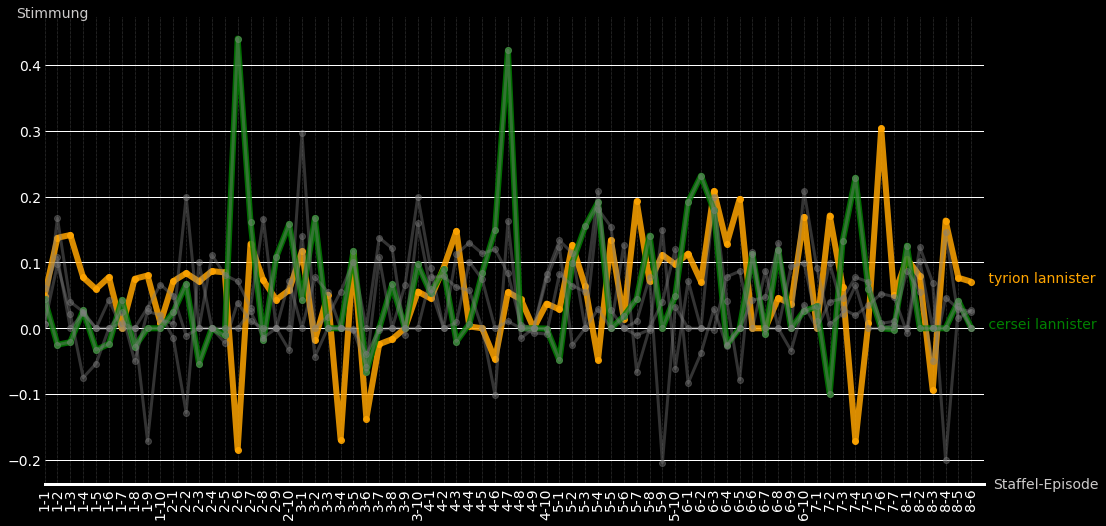

In [485]:
top_5 = ["tyrion lannister", "cersei lannister", "daenerys targaryen", "jon snow", "jaime lannister"]
focus = ["cersei lannister", "tyrion lannister"]
plot_wc(dfsenti, top_5, focus)

In [68]:
def plot_senti(df, focusname):
    plt.figure(figsize=(18,5))
    plt.xticks(rotation=90)
    plt.plot(dfcat['Season-Episode'], dfcat['Polarity'], marker='', color='orange', linewidth=4, alpha=0.7)
    plt.text(dfcat["Season-Episode"].tail(1), dfcat.Polarity.tail(1), ' '+ dfcat["Name"].iloc[0], horizontalalignment='left', size='small', color='orange')
    

In [565]:
script[(script["Episode"] == "Episode 6") & (script["Season"] == "Season 2") & (script["Name"] == "tyrion lannister") & (script["Polarity"] != 0)].sort_values(by="Polarity")[["Name", "Sentence", "Polarity"]].values

array([['tyrion lannister',
        "We've had vicious kings and we've had idiot kings, but I don't know if we've ever been cursed with a vicious idiot for a king.",
        -0.8999999999999999],
       ['tyrion lannister', 'Oh, you blind, bloody fool!', -0.75],
       ['tyrion lannister',
        "And now I've struck a king. Did my hand fall from my wrist? Where is the Stark girl?",
        -0.2],
       ['tyrion lannister',
        'Take some men and go and find the Stark girl.', -0.2],
       ['tyrion lannister',
        "They threw a cow pie at you, so you decided to kill them all? They're starving, you fool! All because of a war you started.",
        -0.16666666666666666]], dtype=object)

In [550]:
script.iloc[5285:5290,:]

,Release Date,Season,Episode,Episode Title,Name,Sentence,Tokenize Words,Tokenize Words Alphanumeric Only,Sentence Word Count,Row,Family Name,Sentiment Scores,Polarity,Subjectivity,appearances,FamCodes,talks_to
5285,2012-05-06,Season 2,Episode 6,The Old Gods and the New,ygritte,Call for them. Go on. Call loudly.,"['Call', 'for', 'them', '.', 'Go', 'on', '.', ...","['Call', 'for', 'them', 'Go', 'on', 'Call', 'l...",7,5285,other,"Sentiment(polarity=0.1, subjectivity=0.8)",0.10000,0.80,1,6,jon snow
5286,2012-05-06,Season 2,Episode 6,The Old Gods and the New,septon,May the Seven guide the princess on her journe...,"['May', 'the', 'Seven', 'guide', 'the', 'princ...","['May', 'the', 'Seven', 'guide', 'the', 'princ...",27,5286,other,"Sentiment(polarity=0.0, subjectivity=0.0)",0.00000,0.00,1,6,ygritte
5287,2012-05-06,Season 2,Episode 6,The Old Gods and the New,cersei lannister,One day I pray you love someone. I pray you lo...,"['One', 'day', 'I', 'pray', 'you', 'love', 'so...","['One', 'day', 'I', 'pray', 'you', 'love', 'so...",49,5287,lannister,"Sentiment(polarity=0.44000000000000006, subjec...",0.44000,0.52,1,4,septon
5288,2012-05-06,Season 2,Episode 6,The Old Gods and the New,joffrey lannister,You sound like a little cat mewling for his mo...,"['You', 'sound', 'like', 'a', 'little', 'cat',...","['You', 'sound', 'like', 'a', 'little', 'cat',...",13,5288,lannister,"Sentiment(polarity=0.10625000000000001, subjec...",0.10625,0.45,1,4,cersei lannister
5289,2012-05-06,Season 2,Episode 6,The Old Gods and the New,sansa stark,I saw you cry.,"['I', 'saw', 'you', 'cry', '.']","['I', 'saw', 'you', 'cry']",4,5289,stark,"Sentiment(polarity=0.0, subjectivity=0.0)",0.00000,0.00,1,8,joffrey lannister


In [ ]:
dfsenti["Season-Episode"].unique()

In [388]:
tags = script["Name"]
tags = tags.tolist()
tags.insert(0, "will")
tags.pop()
script["talks_to"] = tags

In [389]:
script.columns

Index(['Release Date', 'Season', 'Episode', 'Episode Title', 'Name',
       'Sentence', 'Tokenize Words', 'Tokenize Words Alphanumeric Only',
       'Sentence Word Count', 'Row', 'Family Name', 'Sentiment Scores',
       'Polarity', 'Subjectivity', 'appearances', 'FamCodes', 'talks_to'],
      dtype='object')

In [428]:
network_df = script[["Name", "talks_to"]]
network_df = network_df[network_df["Name"].isin(top_20["Name"][:20])]
network_df = network_df[network_df["talks_to"].isin(top_20["Name"][:20])]
network_df["Name"].unique()

array(['jon snow', 'robb stark', 'theon greyjoy', 'jaime lannister',
       'cersei lannister', 'catelyn stark', 'sansa stark',
       'tyrion lannister', 'daenerys targaryen', 'jorah mormont',
       'arya stark', 'petyr baelish', 'varys', 'bronn', 'tywin lannister',
       'sam', 'davos', 'stannis baratheon', 'brienne', 'olenna tyrell'],
      dtype=object)

In [430]:
network_df.head()

,Name,talks_to
16,jon snow,jon snow
22,robb stark,jon snow
53,theon greyjoy,jon snow
59,jon snow,robb stark
60,jon snow,jon snow


In [431]:
family_names = ['lannister','targaryen','snow','stark','baelish','greyjoy','mormont','baratheon','tyrell','clegane','other']

color_selections = ['#84142d','#3282b8','#3282b8','#241663','#834c69','#00454a','#57886c','#602080','#291f1e','#f64740','#a3333d']

def get_family_name(x):
    x = str(x)
    name_split = x.split(' ')
    if len(name_split) > 1 and name_split[1] in family_names[:-1]:
        return name_split[1]
    else:
        return family_names[-1]

network_df['Family Name'] = network_df['Name'].apply(get_family_name)# create dictionary for family color

colors = dict(zip(
    family_names,
    color_selections
    ))

In [461]:
colors

{'lannister': '#84142d',
 'targaryen': '#3282b8',
 'snow': '#3282b8',
 'stark': '#241663',
 'baelish': '#834c69',
 'greyjoy': '#00454a',
 'mormont': '#57886c',
 'baratheon': '#602080',
 'tyrell': '#291f1e',
 'clegane': '#f64740',
 'other': '#a3333d'}

In [432]:
network_df.head()

,Name,talks_to,Family Name
16,jon snow,jon snow,snow
22,robb stark,jon snow,stark
53,theon greyjoy,jon snow,greyjoy
59,jon snow,robb stark,snow
60,jon snow,jon snow,snow


In [471]:
network_df.shape

(6894, 3)

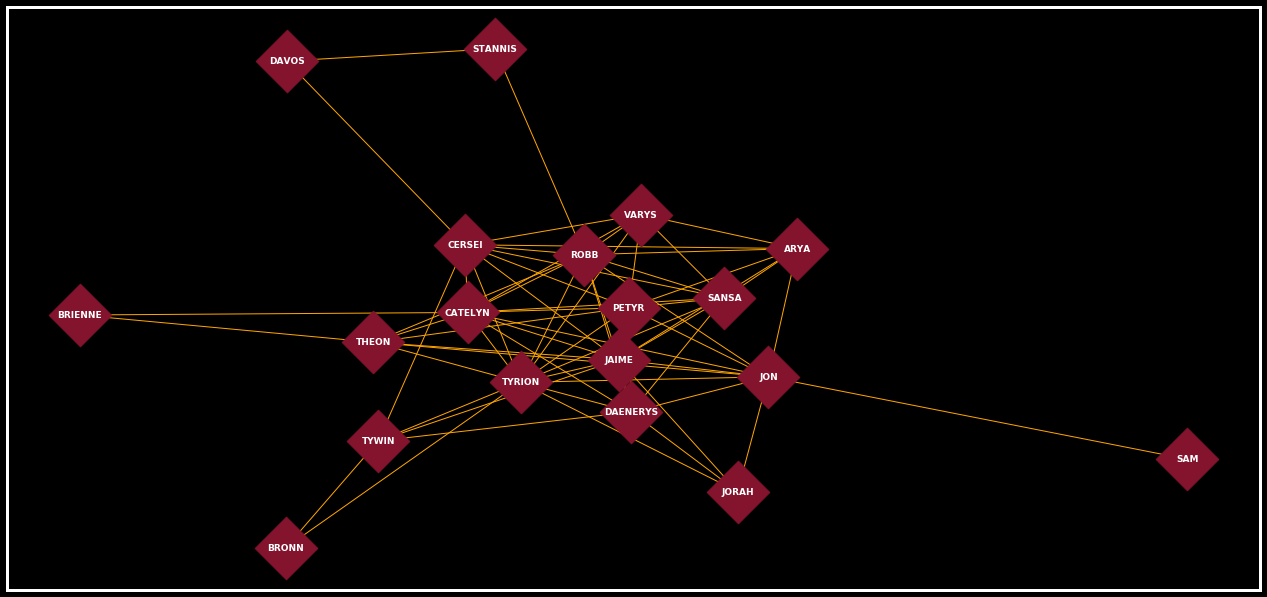

In [483]:
import networkx as nx
import matplotlib.image as mpimg

graphx = nx.Graph()

for i in range(0,1000,1):
    graphx.add_edge(network_df.iloc[i,0].split(" ")[0].upper(), network_df.iloc[i,1].split(" ")[0].upper(), weight=5)
plt.figure(figsize=(20,10))
# Hide grid lines
plt.grid(False)
# Hide axes ticks
plt.xticks([])
plt.yticks([])
nx.draw_networkx(graphx, edge_color="orange", node_color="#84142d",font_size= 9, node_size=2000,node_shape="D" ,font_weight="bold", font_color="white")
plt.savefig("networkgraph.png")

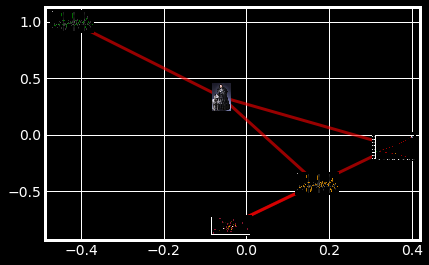

In [468]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from numpy import sqrt
import glob

path = ''
files = [f for f in glob.glob(path + "*.png")]
img = []
for f in files:
    img.append(mpimg.imread(f))
N = len(files)

# generate graph
G = nx.watts_strogatz_graph(N,2,0.2)
pos=nx.spring_layout(G,k=3/sqrt(N))

# draw with images on nodes
nx.draw_networkx(G,pos,width=3,edge_color="r",alpha=0.6)
ax=plt.gca()
fig=plt.gcf()
trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform
imsize = 0.1 # this is the image size
for n in G.nodes():
    (x,y) = pos[n]
    xx,yy = trans((x,y)) # figure coordinates
    xa,ya = trans2((xx,yy)) # axes coordinates
    a = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    a.imshow(img[n])
    a.set_aspect('equal')
    a.axis('off')
plt.savefig('./save.png') 

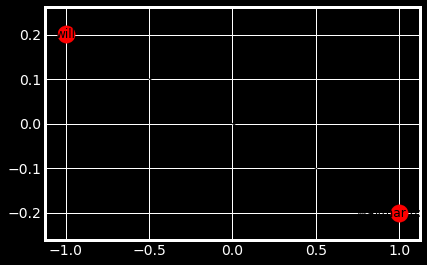

In [393]:
import networkx as nx
graph2 = nx.Graph()
network_df = script[["Name", "talks_to"]]
network_df.apply(lambda x: graph2.add_edge(x[0], x[1]), axis=0)

nx.draw_networkx(graph2)